# Atividade 2: Árvores de Decisãão


*   Treinar árvores de decisão para tarefas de classificação
*   Observar impacto de diferentes parâmetros na árvore de decisão
gerada, como critérios de seleção, parâmetros para controlar
complexidade da árvore, e uso de estratégias de poda
*   Interpretar as árvores de decisão obtidas

### Objetivo principal: 
Aplicar árvores de decisão para uma tarefa de classificação.

### Material:
Python3 + pacote scikit-learn​ (método DecisionTreeClassifier, que permite configurar hiperparâmetros como:
*   criterion (usar índice Gini ou Entropia);
*   max_depth (profundidade máxima da árvore);
*   min_samples_leaf (número mínimo de objetos no nó folha)
*   ccp_alpha (parâmetro de complexidade usado na poda, por padrão, não aplica a poda).

### Dataset:
1984 United States Congressional Voting ​

Obj.: predizer o partido, democratas ou republicano, ao
qual cada membro da Câmara dos Representantes do congresso dos Estados Unidos é afiliado a partir dos seus votos registrados (dados de 1984).

Possui 16 atributos categóricos + 1 atributo target + 435 instâncias.







* Passo 1: utilize o método ​ holdout es ​ tratificado adotando a ​ acurácia
(taxa de acerto) como medida de desempenho. ​ Sugere-se dividir os
dados em 80% para treinamento e 20% para teste.

* Passo 2: durante o treinamento das árvores, faça variações nos hiperparâmetros
conforme o “​ Guia de experimentos ” ​ abaixo. Forneça no seu relatório os
resultados para cada experimento em ​ forma de tabela ou gráficos de
desempenho e a ​ estrutura das árvores geradas

* ​ Passo 3: comente brevemente acerca do resultado, ressaltando como a ​ variação do hiperparâmetro impacta na acurácia do modelo ​ e na complexidade da árvore.

# Experimentos:


1.   Treine e teste árvores de decisão utilizando dois critérios distintos de seleção de atributos, Gain Ratio/Entropy (C4.5/J48) e Índice Gini (CART),
mantendo os demais hiperparâmetros com valor padrão.

Q1.: As árvores obtidas possuem desempenho e estrutura similar?

Q2.: Os mesmos atributos são utilizados em ambas as árvores?

Q3.: Qual parece ser o atributo mais relevante para a classificação, de acordo com cada modelo gerado?

2. Selecione um dos algoritmos utilizados no experimento anterior e repita
o treinamento variando o valor de hiperparâmetros relacionados à
complexidade do modelo (como profundidade máxima e/ou número de
atributos no nó folha). Informe no relatório os valores testados para
cada hiperparâmetro.

  2.1 Demonstre e comente como a variação destes hiperparâmetros impacta na acurácia e complexidade do modelo (uso o modelo obtido no item A como “baseline”).

  2.2 Compare também as regras de classificação extraídas a partir de ambos os modelos, comentando brevemente como estes parâmetros parecem impactar no poder de generalização das regras (isto é, se as regras de classificação extraídas parecem ser mais “genéricas” ou “mais especializadas” para
subconjunto de instâncias de treinamento).

  2.3 Inclua exemplos de regras de classificação obtidas a partir dos modelos gerados.

3. Selecione um dos algoritmos utilizados no experimento do item A e
repita o processo de treinamento com e sem estratégia de poda (caso
não seja possível optar por treinamento sem poda, varie o
hiperparâmetro associado ao controle da complexidade na etapa de
poda).

  3.1 Compare os modelos obtidos (estrutura da árvore, número de
testes, atributos usados, etc.) e seus respectivos desempenhos. Informe no relatório os valores testados para cada hiperparâmetro.

  3.2 Intuitivamente, qual modelo você imagina ser melhor para classificar
novas instâncias: o que utiliza ou não utiliza estratégia de poda (ou, de
forma alternativa, aquele com uma poda mais ou menos drástica)?


# Importar bibliotecas

In [ ]:
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # importa Decision Tree Classifier

from sklearn import metrics # importa scikit-learn metrics module
                            # para calcular a acurácia

## Pré-processamento dos dados

In [ ]:
df = pd.read_csv("vote.tsv", sep="\t")
df.shape # tamanho do dataset
df.columns # ver o nome das colunas
df.head(5) # ver as 5 primeiras amostras 

,handicapped infants,water project cost sharing,adoption of the budget resolution,physician fee freeze,el salvador aid,religious groups in schools,anti satellite test ban,aid to nicaraguan contras,mx missile,immigration,synfuels corporation cutback,education spending,superfund right to sue,crime,duty free exports,export administration act south africa,target
0,0,0,2,2,2,2,0,0,2,2,0,2,2,2,0,2,republican
1,2,0,2,2,2,2,2,2,0,2,0,2,0,2,2,2,republican
2,0,2,2,0,2,1,2,0,0,2,2,0,2,0,2,2,democrat
3,2,0,2,0,2,2,0,0,0,0,0,0,0,0,0,2,democrat
4,0,2,0,2,2,2,0,0,0,0,2,2,2,2,0,0,republican


In [ ]:
# fazer uma divisão em atributos e classe (target)
X = df.drop('target', axis=1) # contém todas as colunas, menos a 'target'
y = df['target'] # somente a coluna target

# df com o nome das colunas sem o target
feature_columns = X.columns
feature_columns

Index(['handicapped infants', 'water project cost sharing',
       'adoption of the budget resolution', 'physician fee freeze',
       'el salvador aid', 'religious groups in schools',
       'anti satellite test ban', 'aid to nicaraguan contras', 'mx missile',
       'immigration', 'synfuels corporation cutback', 'education spending',
       'superfund right to sue', 'crime', 'duty free exports',
       'export administration act south africa'],
      dtype='object')

### Passo 1:
#### Utilize o método ​ holdout es ​ tratificado adotando a ​ acurácia (taxa de acerto) como medida de desempenho. ​ Sugere-se dividir os dados em 80% para treinamento e 20% para teste.

In [ ]:
from sklearn.model_selection import train_test_split
# a linha abaixo divide o dataset em 80% treino e 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Para realizar a classificação, a classe DecisionTreeClassifier da biblioteca Scikit-learn é usada. Este tipo de método de ajuste é denominado treinamento de algoritmo em dados de treinamento do dataset, que é passado como parâmetro para o método de ajuste (fit method). O seguinte script treinará o algoritmo:

In [ ]:
classifier = DecisionTreeClassifier() # cria o objeto 
classifier = classifier.fit(X_train, y_train)  # treina o classificador da árvore de decisão
# o treinamento default é com com o critério gini. 
classifier

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# predição da resposta para o dataset de teste
y_pred = classifier.predict(X_test)

# acurácia do modelo
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.9080459770114943


### Abaixo é utilizada a função export_graphviz para exibir a árvore em um bloco de notas

No gráfico da árvore de decisão, cada nó interno possui uma regra de decisão que divide os dados. Gini se refere à razão de Gini, que mede a impureza do nó. É possível afirmar que um nó é puro quando todos os seus registros pertencem à mesma classe, tais nodos conhecidos como nó folha. 

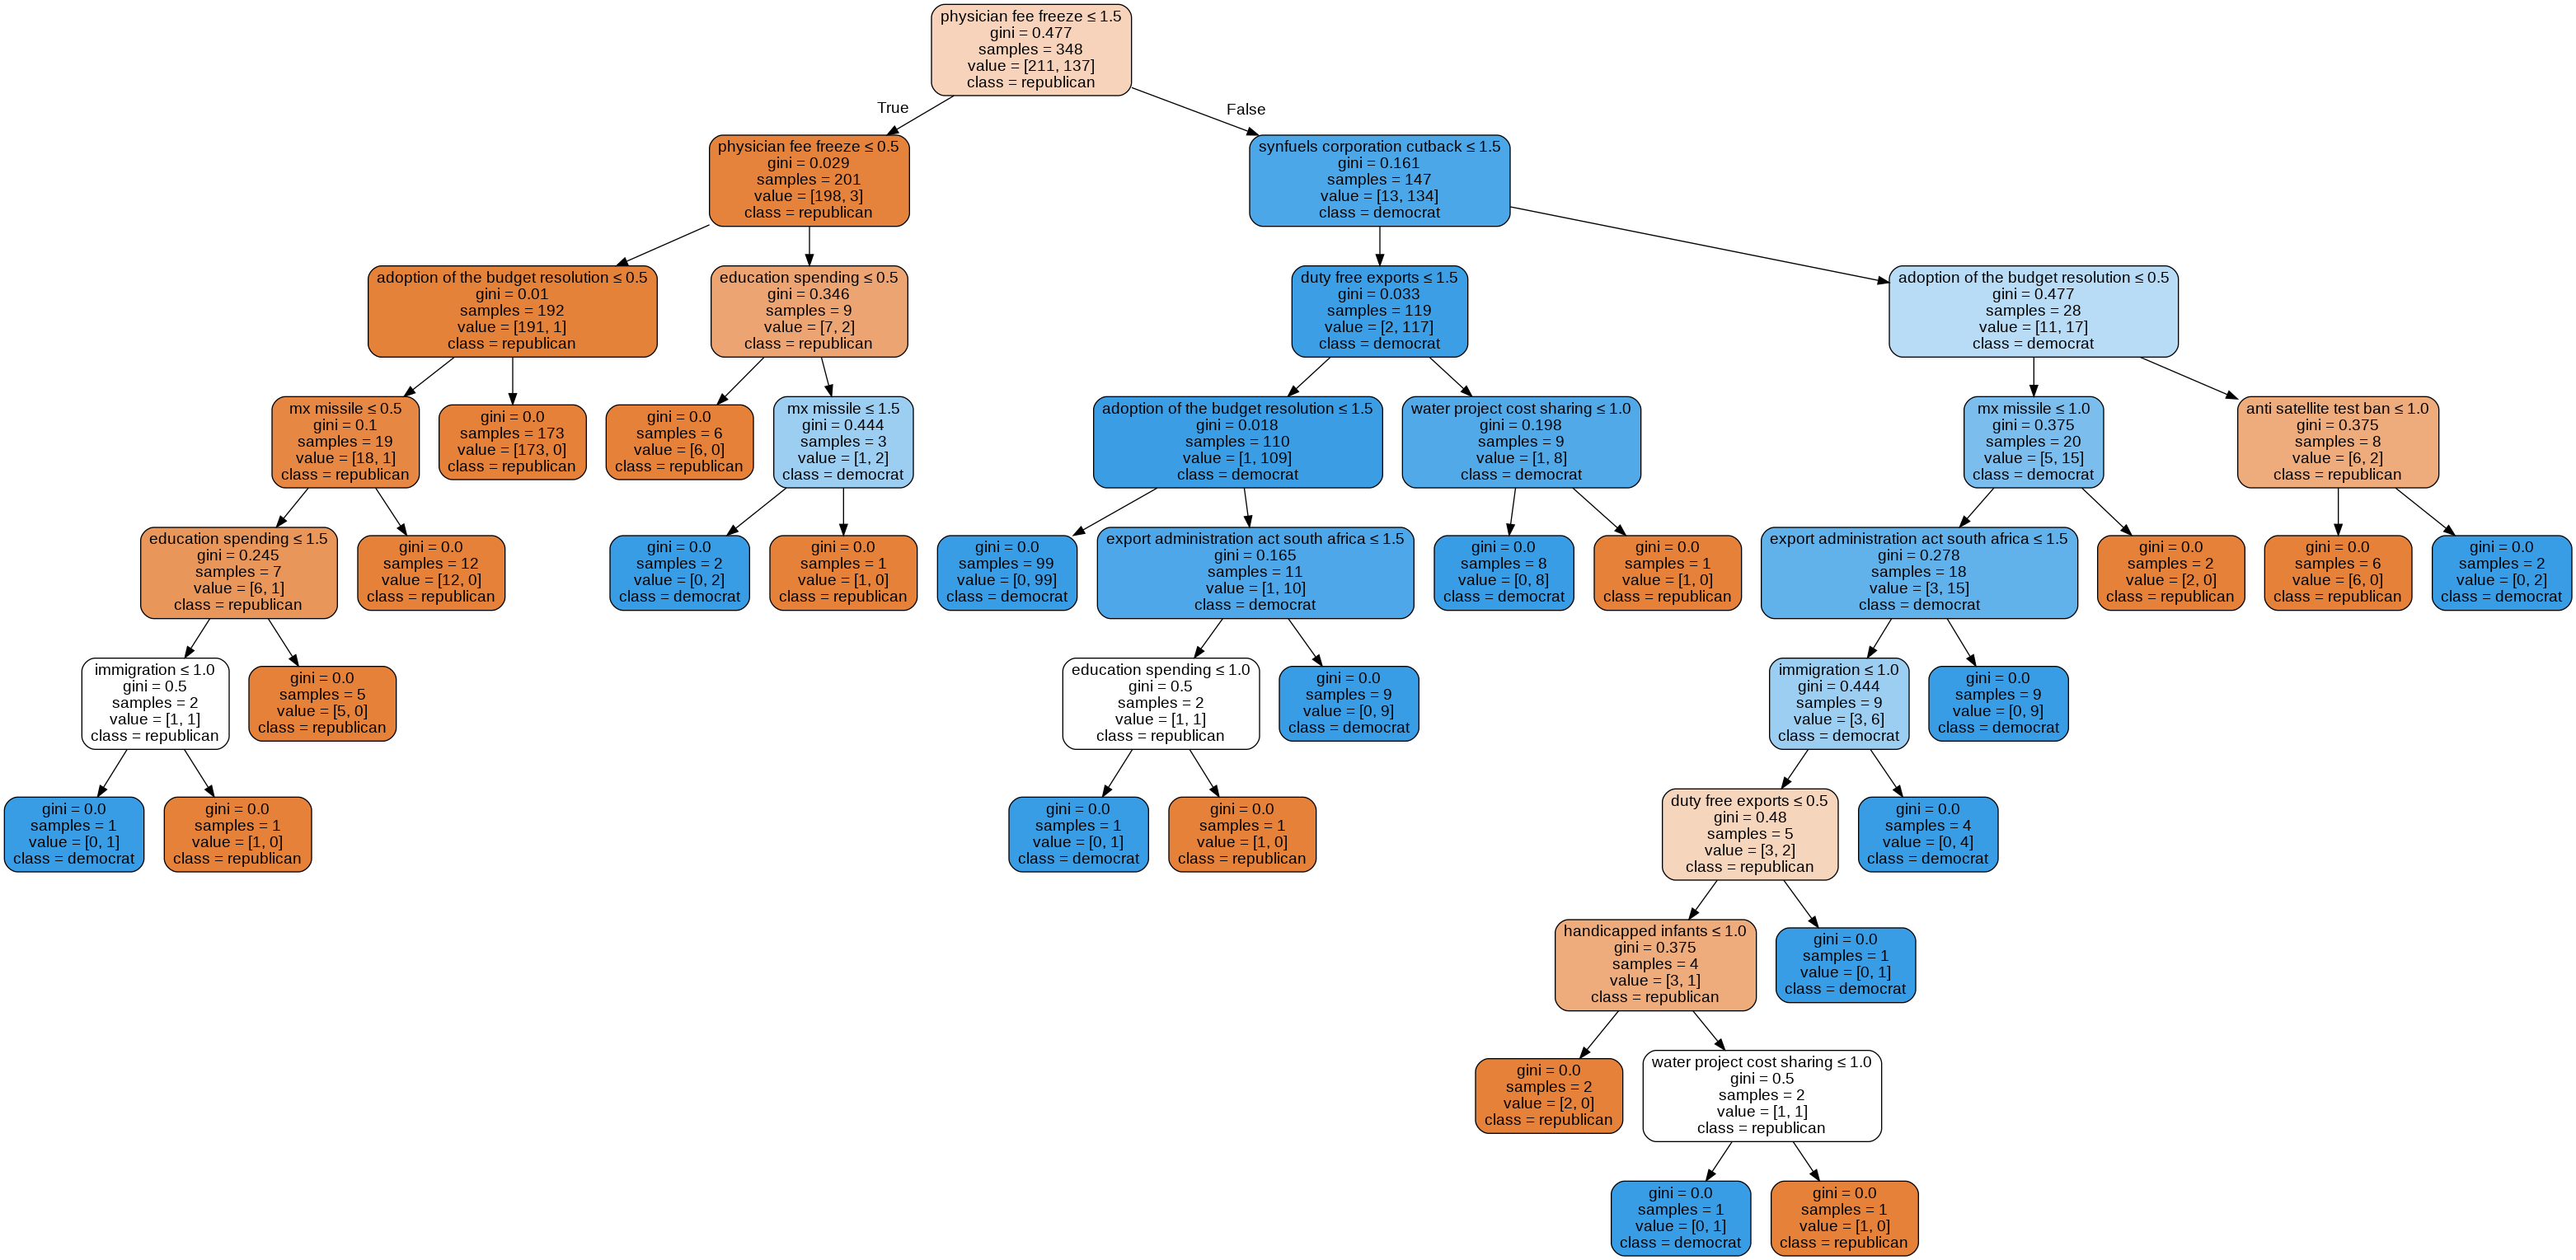

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = feature_columns,class_names=['republican','democrat'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('vote_gini.png')
Image(graph.create_png())

### Passo 2: 

#### durante o treinamento das árvores, faça variações nos hiperparâmetros conforme o "Guia de experimentos" ​ abaixo. Forneça no seu relatório os resultados para cada experimento em ​ forma de tabela ou gráficos de desempenho e a ​ estrutura das árvores geradas.




Treine e teste árvores de decisão utilizando dois critérios distintos de seleção de atributos:

*   Gain Ratio/Entropy (C4.5/J48)
*   Índice Gini (CART)

mantendo os demais hiperparâmetros com valor padrão.

(o treino com o critério gini é apresentado anteriormente, como configuração default)

In [ ]:
# treinamento utilizando entropy como critério
classifier2 = DecisionTreeClassifier(criterion="entropy")

# treina o classificador da árvore de decisão
classifier2 = classifier2.fit(X_train,y_train)

classifier2

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# predição da resposta para o dataset de teste
y_pred = classifier2.predict(X_test)

# apresenta a acurácia
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.9195402298850575


Em termos de computação, a entropia é mais complexa porque utiliza logaritmos, então o cálculo do coeficiente de Gini será executada de maneira mais rápida.

**Q1.: As árvores obtidas possuem desempenho e estrutura similar?**

R: Como pode ser observado pelo os valores das acurácias acima, os resultados são muito semelhantes. Porém conforme cada vez é executado o treinamento, pode haver uma diferença mínima entre os resultados, sendo que onde o critério de entropia (entropy) é utilizado, o resultado é um pouco melhor. 

**Q2.: Os mesmos atributos são utilizados em ambas as árvores?**

R: Sim, somente foi trocado a medida de seleção de atributos (entropy ao invés do default Gini)

**Q3.: Qual parece ser o atributo mais relevante para a classificação, de acordo com cada modelo gerado?**

Para cada atributo no dataset, o algoritmo da árvore de decisão forma um nó, onde o atributo mais importante é colocado no nó raiz. Após visualizar o plotting da árvore tanto para a classificação utilizando o critério Gini quanto Entropy, o atributo mais importante foi "***physician fee freeze***", já que ele se encontra na raíz da árvore.


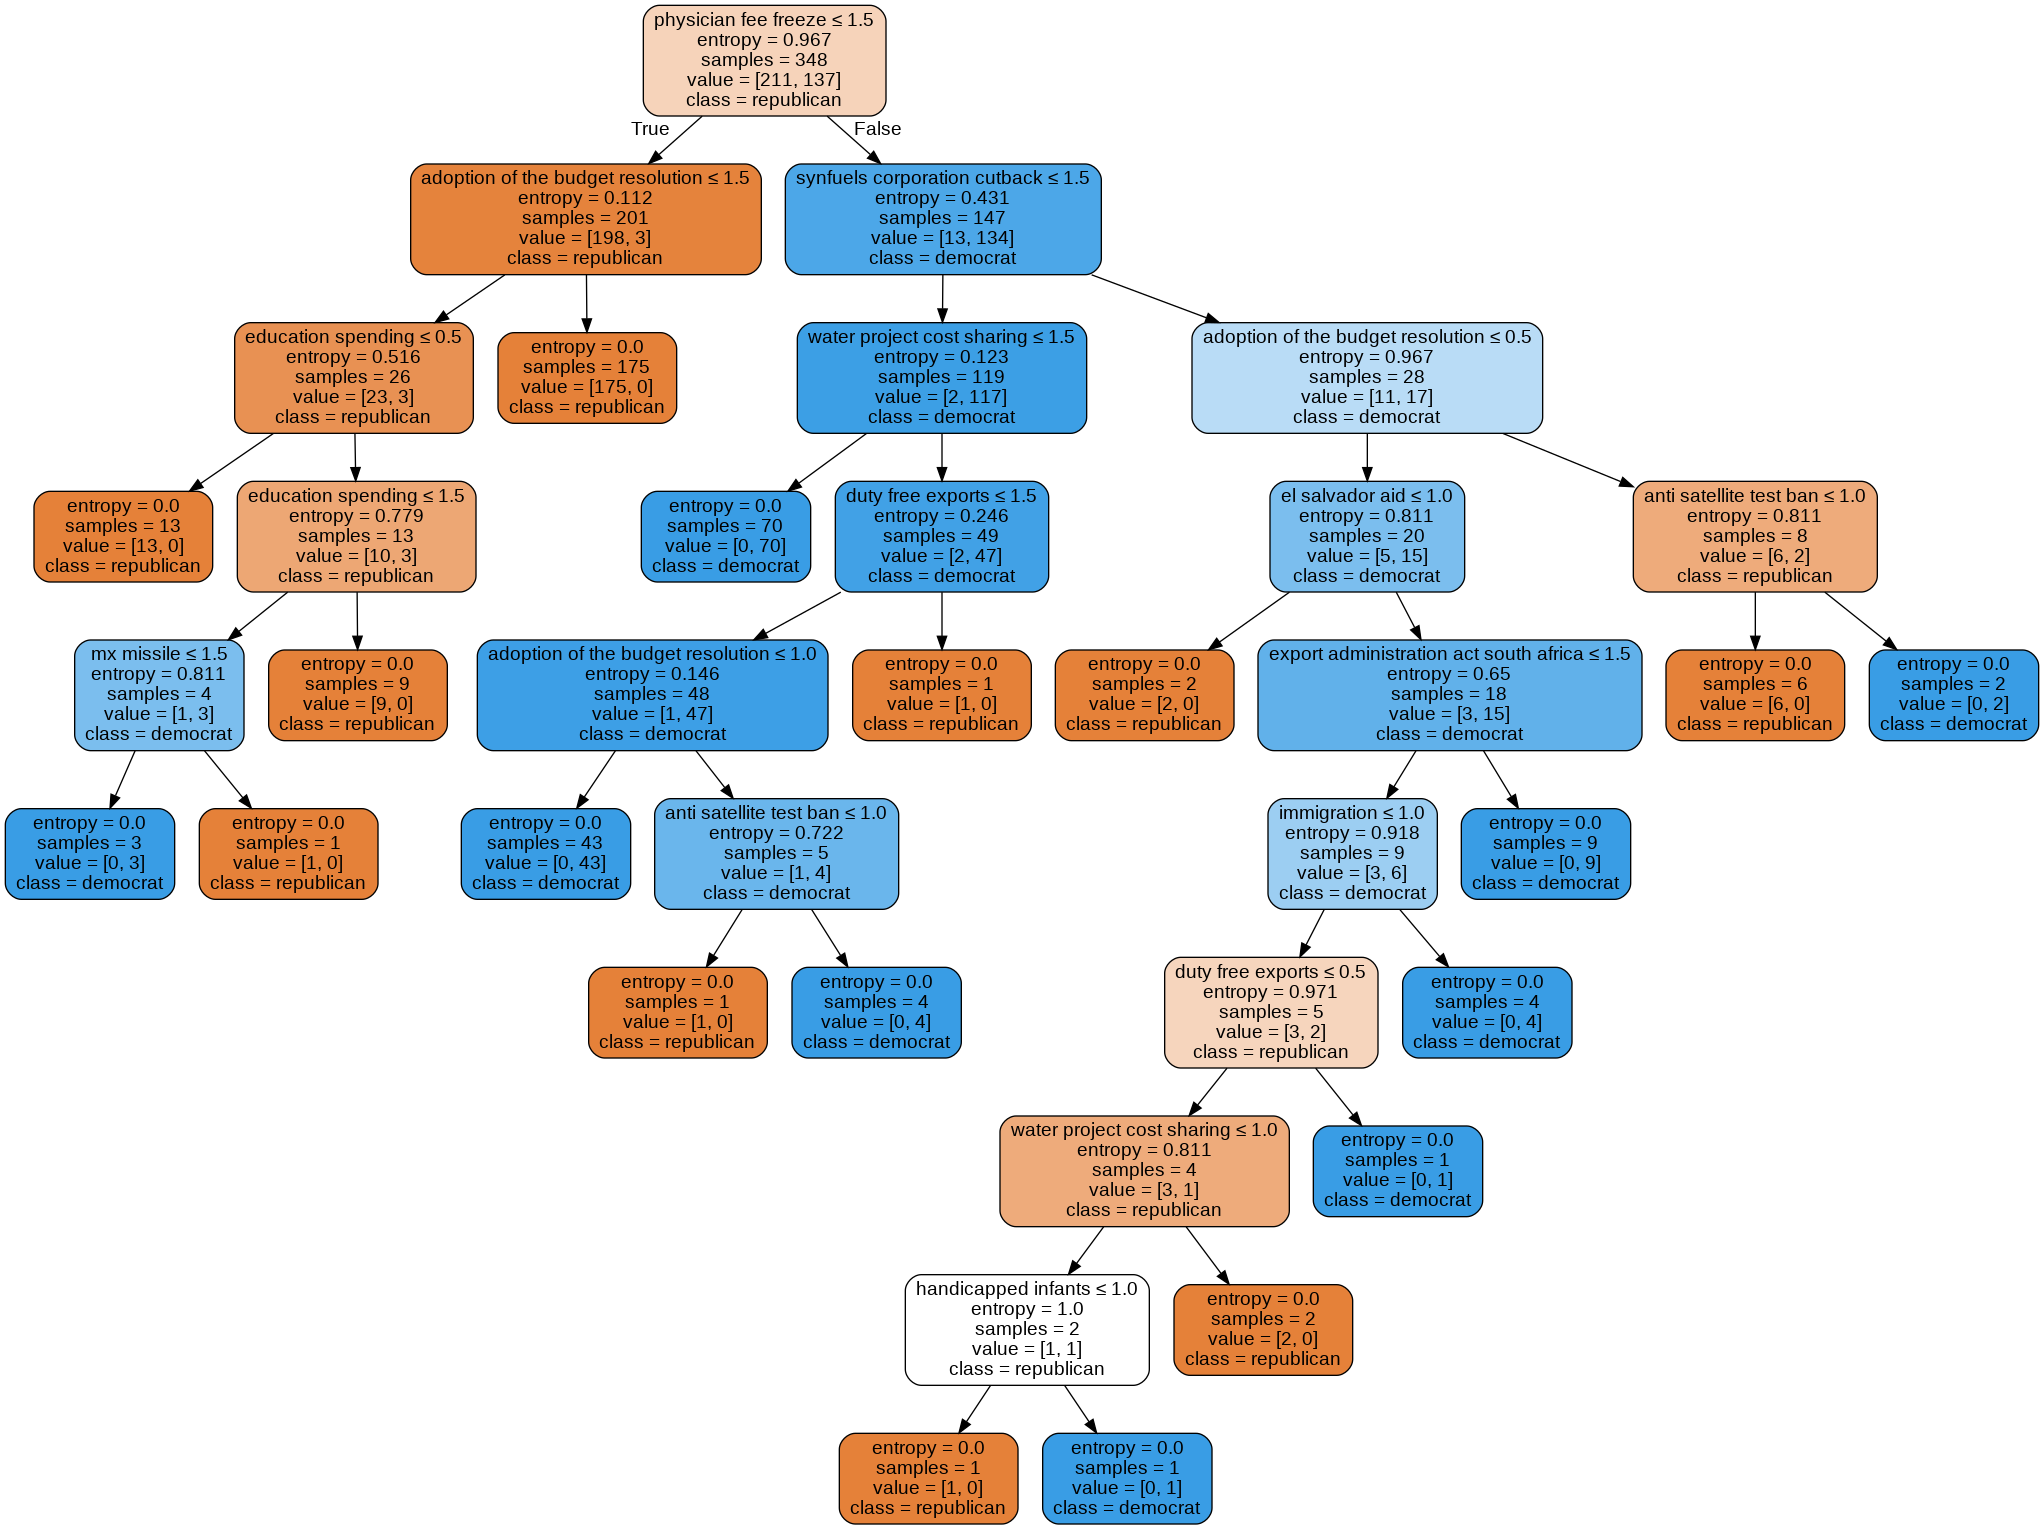

In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = feature_columns,class_names=['republican','democrat'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('vote_entropy.png')
Image(graph.create_png())

### 2. Selecione um dos algoritmos utilizados no experimento anterior e repitao treinamento variando o valor de hiperparâmetros relacionados à complexidade do modelo (como profundidade máxima e/ou número de atributos no nó folha). Informe no relatório os valores testados para cada hiperparâmetro.

In [ ]:
# parâmetros 
# default = padrão
# criterion : default = "gini" para Gini index e
#             "entropy" para ganho de informação.

# splitter  : default = "best" escolhe a melhor divisão (split) e
#           "random" (aleatório) para escolher a melhor divisão aleatória.

#max_depth (deve ser tipo int): default = None, 
#            os nodos são expandidos até que todas as folhas contenham menos
#            de amostras "min_samples_split".
#            Para tipo int: o valor mais alto da profundidade   
#            máxima causa overfitting, e o menor valor causa underfitting.

No pacote Scikit-learn, a otimização do classificador da árvore de decisão é realizada apenas por pré-poda. A profundidade máxima da árvore pode ser usada como uma variável de controle para a pré-poda.

Por exemplo: para plotar uma árvore de decisão nos mesmos dados com *max_depth* = 5 e medida de seleção (*criterion*) como entropia:

In [ ]:
new_classifier = DecisionTreeClassifier(criterion="entropy", 
                                        max_depth=5)

# treino
new_classifier = new_classifier.fit(X_train,y_train)

# predição para o dataset de teste
y_pred = new_classifier.predict(X_test)

# resultado da acurácia
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.9540229885057471


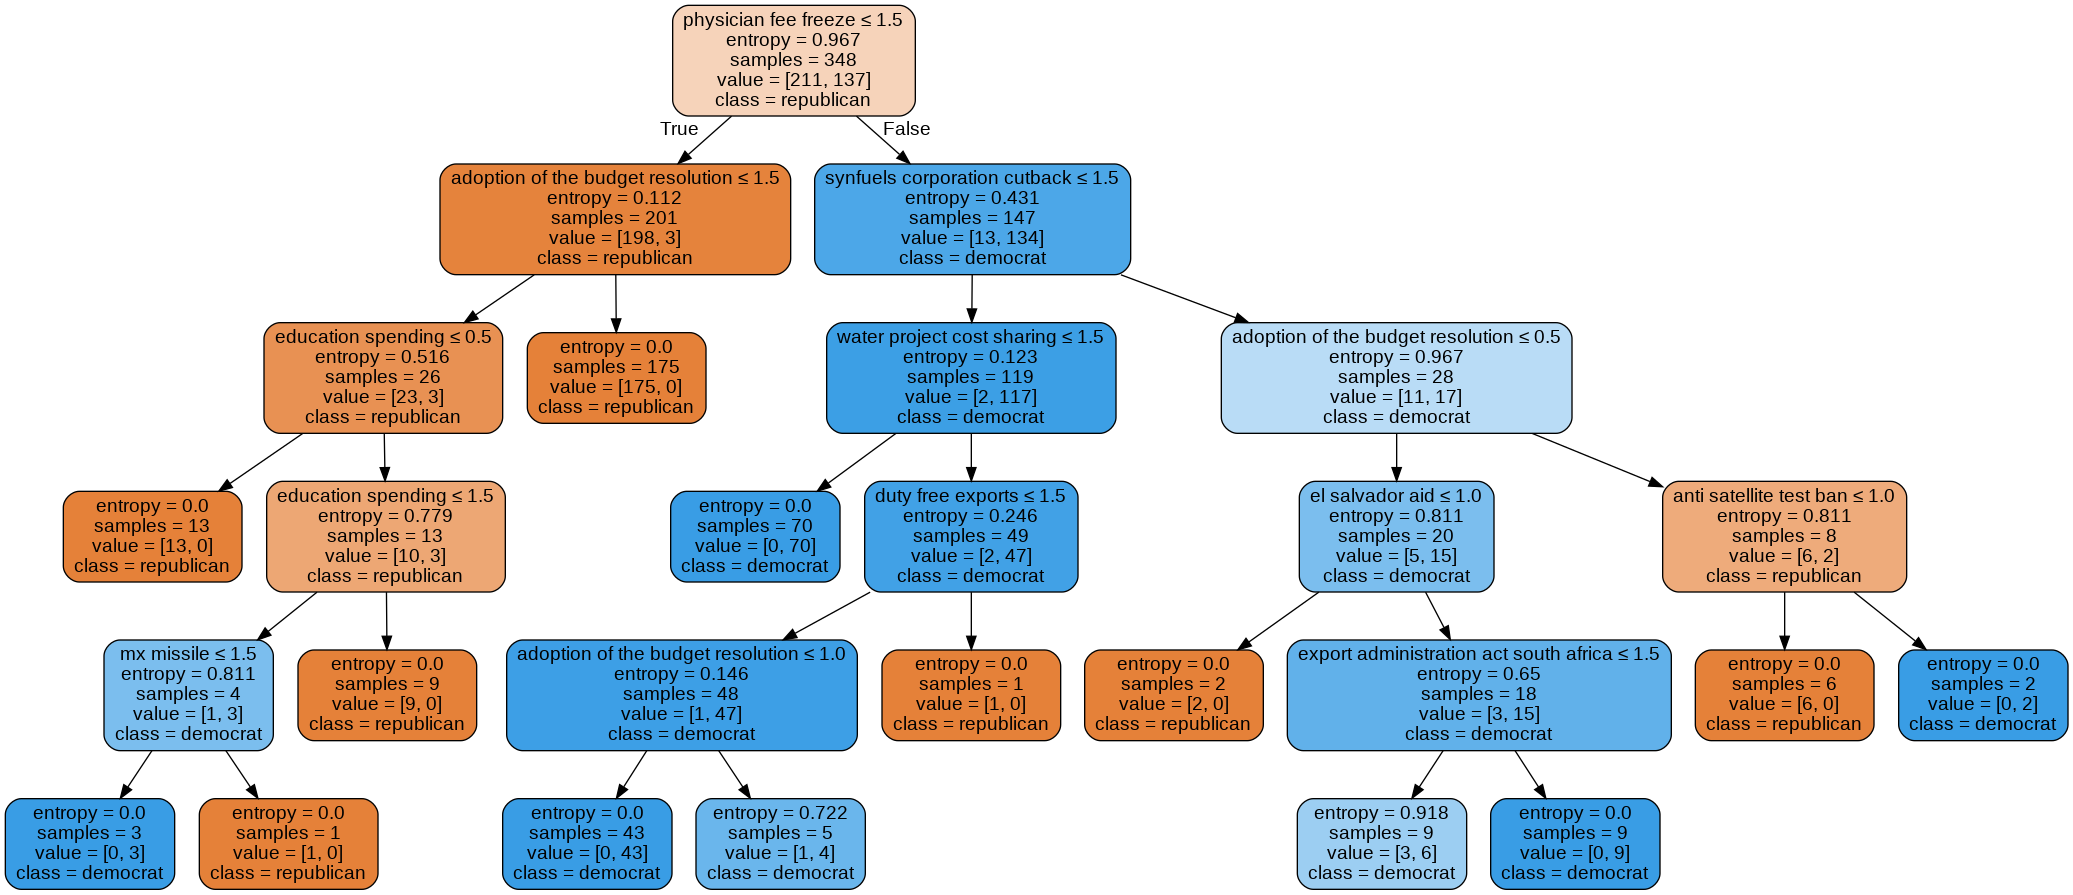

In [ ]:
dot_data = StringIO()
export_graphviz(new_classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names = feature_columns,class_names=['republican','democrat'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('vote_entrop_depth_5.png')
Image(graph.create_png())

Comparado com os diagramas de modelo de árvore de decisão anteriores, o modelo podado (max_depth = 5) é mais simples, fácil de explicar e entender.

### 3.2 Intuitivamente, qual modelo você imagina ser melhor para classificar novas instâncias: o que utiliza ou não utiliza estratégia de poda (ou, de forma alternativa, aquele com uma poda mais ou menos drástica)?

**Resposta:** o modelo com poda é melhor para classificar as novas instâncias, pois como demonstrado anteriormente nos testes realizados, a acurácia do modelo com poda foi maior e é mais simples de ver a relação das folhas na árvore e as tomadas de decisão. 